In [1]:
%config InlineBackend.rc = {"figure.dpi": 72, 'figure.figsize': (6.0, 4.0)}
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from abtem.transfer import polar_symbols
from mpl_toolkits.axes_grid1 import ImageGrid

import abtem

abtem.config.set({"local_diagnostics.progress_bar": False});

In [53]:
def plot_coefficients(nm, measurements):
    nrows, ncols = (5, 7)
    fig = plt.figure(figsize=(12, 10))
    axes = ImageGrid(
        fig,
        111,
        nrows_ncols=(nrows, ncols),
        **{"axes_pad": 0.0},
    )
    
    axes = np.array(axes).reshape((5, 7))
    
    for measurement, (n, m) in zip(measurements, nm):
        ax = axes[(n - 1, m)]
        measurement.show(ax=ax)
    
    for ax in axes.ravel():
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel("")
        ax.set_ylabel("")
        
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["left"].set_visible(False)
    
    for i, ax in enumerate(axes[:, 0]):
        ax.set_ylabel(f"$n={i + 1}$", fontsize=15)
    
    for i, ax in enumerate(axes[0, :]):
        ax.set_title(f"$m={i}$", fontsize=15)

In [54]:
symbols = [symbol for symbol in polar_symbols if symbol[0] == "C"]

nm = [(int(c[-2]), int(c[-1])) for c in symbols]

ctfs = [
    abtem.CTF(energy=100e3, semiangle_cutoff=30, **{symbol: 50 ** n})
    for symbol, (n, m) in zip(symbols, nm)
]

diffraction_patterns = [ctf.to_diffraction_patterns(max_angle=30) for ctf in ctfs]

point_spread_functions = [
    ctf.to_point_spread_functions(gpts=256, extent=40)
    .build()
    .complex_images()
    .crop(extent=(10, 10), offset=(15, 15))
    for ctf in ctfs
]

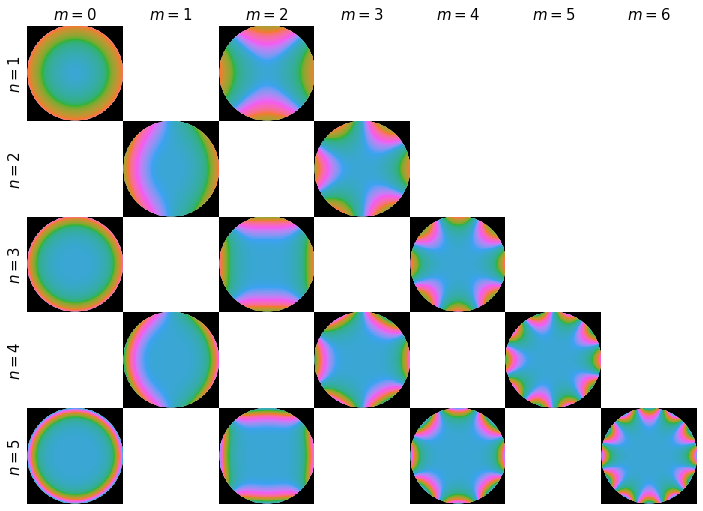

In [55]:
plot_coefficients(nm, diffraction_patterns)
plt.savefig("../walkthrough/images/ctf.png", bbox_inches="tight", pad_inches=0.)

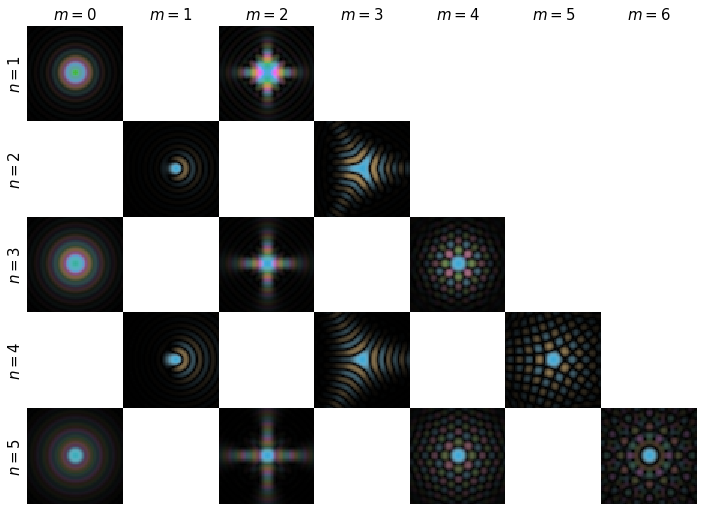

In [56]:
plot_coefficients(nm, point_spread_functions)
plt.savefig("../walkthrough/images/psf.png", bbox_inches="tight", pad_inches=0.)